## Table of Contents
* [1. Importing Libraries](#1.-Importing-Libraries)
* [2. Importing Data](#2.-Importing-Data)
* [3. Visualizations](#3.-Visualizations)
    * [3.1 Customer Profile Ordering Habits](#3.1-Customer-Profile-Ordering-Habits)
        * [3.1.1 Customer Profiles and Departments](#3.1.1-Customer-Profiles-and-Departments)
        * [3.1.2 Customer Profiles and Regions](#3.1.2-Customer-Profiles-and-Regions)
        * [3.1.3 Customer Profiles and Frequency](#3.1.3-Customer-Profiles-and-Frequency)
        * [3.1.4 Customer Profiles and Price Range](#3.1.4-Customer-Profiles-and-Price-Range)
        * [3.1.5 Customer Profiles and Spending Habits](#3.1.5-Customer-Profiles-and-Spending-Habits)
        * [3.1.6 Customer Profiles and Time](#3.1.6-Customer-Profiles-and-Time)
        
        
    * [3.2 Loyalty Profile Ordering Habits](#3.2-Loyalty-Profile-Ordering-Habits)
        * [3.2.1 Loyalty and Departments](#3.2.1-Loyalty-and-Departments)
        * [3.2.2 Loyalty and Spending Flag](#3.2.2-Loyalty-and-Spending-Flag)
        * [3.2.3 Loyalty and Frequency](#3.2.3-Loyalty-and-Frequency)
        * [3.2.4 Loyalty and Time](#3.2.4-Loyalty-and-Time)
        * [3.2.5 Loyalty and Price Range](#3.2.5-Loyalty-and-Price-Range)
    * [3.3 Regional Ordering Habits](#3.3-Regional-Ordering-Habits)
        * [3.3.1 Regions and Departments](#3.3.1-Regions-and-Departments)
        * [3.3.2 Regions and Frequency](#3.3.2-Regions-and-Frequency)
        * [3.3.3 Regions and Price Range](#3.3.3-Regions-and-Price-Range)
        * [3.3.4 Regions and Time](#3.3.4-Regions-and-Time)
    * [3.4 Age and Fam Status Ordering Habits](#3.4-Age-and-Fam-Status-Ordering-Habits)
        * [3.4.1 Age-Fam Profile and Departments](#3.4.1-Age-Fam-Profile-and-Departments)
        * [3.4.2 Age-Fam Profile and Spending Flag](#3.4.2-Age-Fam-Profile-and-Spending-Flag)
        * [3.2.3 Age-Fam Profile and Frequency](#3.2.3-Age-Fam-Profile-and-Frequency)
        * [3.4.4 Age-Fam Profile and Price Range](#3.4.4-Age-Fam-Profile-and-Price-Range)
        * [3.4.5 Age-Fam Profile and Time](#3.4.5-Age-Fam-Profile-and-Time)
        
    * [3.5 Other Viz](#3.5-Other-Viz)
        * [3.5.1 Price Range Frequency](#3.5.1-Price-Range-Frequency)

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

## 2. Importing Data

In [2]:
# Creating a reusable path to my data

path = r'C:\Users\vaiva\OneDrive\Documents\CareerFoundry\Achievement 4 07-2023 Instacart Basket Analysis'

In [3]:
# Importing orders_products_all_final

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_final.pkl'))

In [4]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,user_id,order_id,order_number,order_day_of_week,order_hour_of_day,...,n_dependants,fam_status,income,_merge,region,exclusion_flag,age_profile,income_profile,dependants_profile,department_name
0,1,Chocolate Sandwich Cookies,61,19,5.800781,138,3139998,28,6,11,...,1,married,49620,both,Midwest,No,Senior,Low,Multiple People Household,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.800781,138,1977647,30,6,17,...,1,married,49620,both,Midwest,No,Senior,Low,Multiple People Household,snacks
3,907,Premium Sliced Bacon,106,12,20.000000,138,2254091,10,5,14,...,1,married,49620,both,Midwest,No,Senior,Low,Multiple People Household,meat seafood
4,1000,Apricots,18,10,12.898438,138,505689,9,6,12,...,1,married,49620,both,Midwest,No,Senior,Low,Multiple People Household,bulk
5,3265,Mini Seedless Watermelon Pack,32,4,1.700195,138,960220,17,5,14,...,1,married,49620,both,Midwest,No,Senior,Low,Multiple People Household,produce


In [5]:
df.shape

(24414877, 38)

## 3. Visualizations

## 3.1 Customer Profile Ordering Habits

### Customer profiles:
1. Age
2. Income
3. Dependants

### 3.1.1 Customer Profiles and Departments

In [6]:
# Creating a color set for visualizations

colors = ['#907C7A','#DDDEBA', '#ADA8BE', '#A28497', '#727E63']

In [7]:
# Creating a crosstab to normalize departments and age profile

dep_age = pd.crosstab(df['department_name'], df['age_profile'], normalize = 'index')

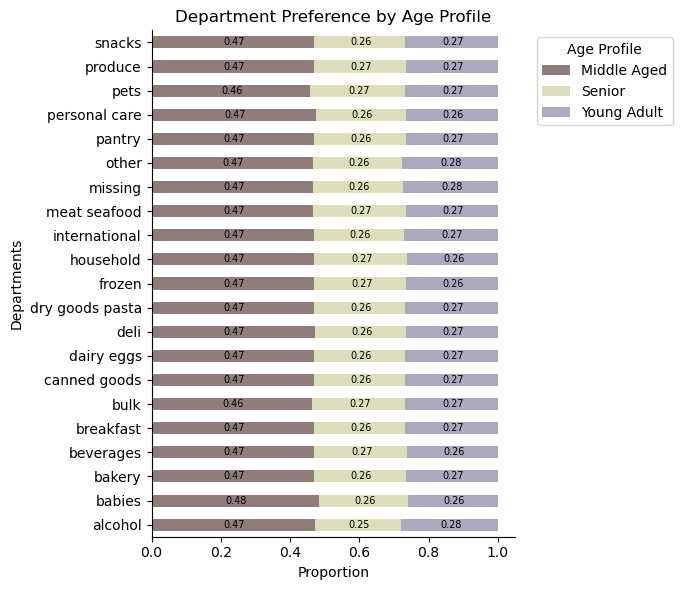

In [8]:
# Bar graph for departments by age profile

bar_dep_age = dep_age.plot.barh(stacked=True, title = 'Department Preference by Age Profile', color=colors, figsize=(7, 6))

plt.xlabel('Proportion')
plt.ylabel('Departments')

plt.legend(title='Age Profile', bbox_to_anchor=(1.04, 1))

# Display the values on top of each bar
for container in bar_dep_age.containers:
    bar_dep_age.bar_label(container, label_type="center", fmt="%.2f", fontsize=7, color='black', padding=1)

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [9]:
# Export bar chart
bar_dep_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_departments_age.png'))

In [10]:
# Creating a crosstab to normalize departments and income profile

dep_income = pd.crosstab(df['department_name'], df['income_profile'], normalize = 'index')

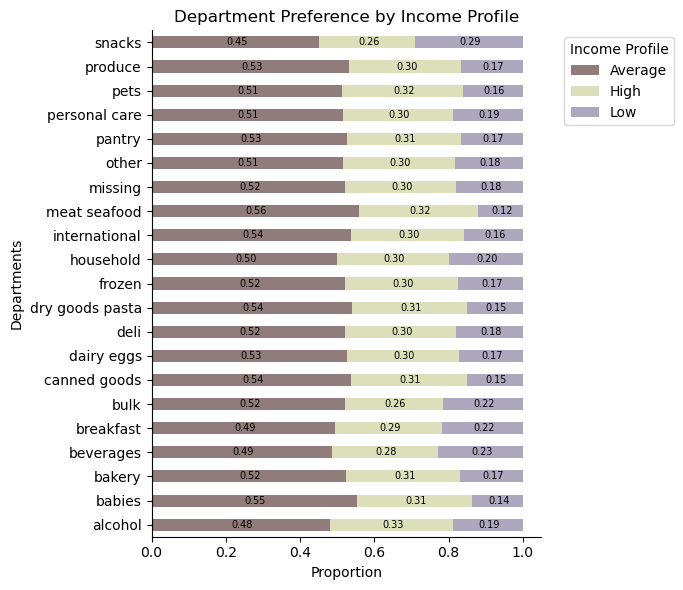

In [11]:
# Bar for departments by income profile

bar_dep_income = dep_income.plot.barh(stacked = True, title = 'Department Preference by Income Profile', color=colors, figsize=(7, 6))

plt.xlabel('Proportion')
plt.ylabel('Departments')

plt.legend(title='Income Profile', bbox_to_anchor=(1.04, 1))

# Display the values on top of each bar
for container in bar_dep_income.containers:
    bar_dep_income.bar_label(container, label_type="center", fmt="%.2f", fontsize=7, color='black', padding=1)

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [12]:
# Export bar chart
bar_dep_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_departments_income.png'))

In [13]:
# Creating a crosstab to normalize departments and dependant profile

dep_depend = pd.crosstab(df['department_name'], df['dependants_profile'], normalize = 'index')

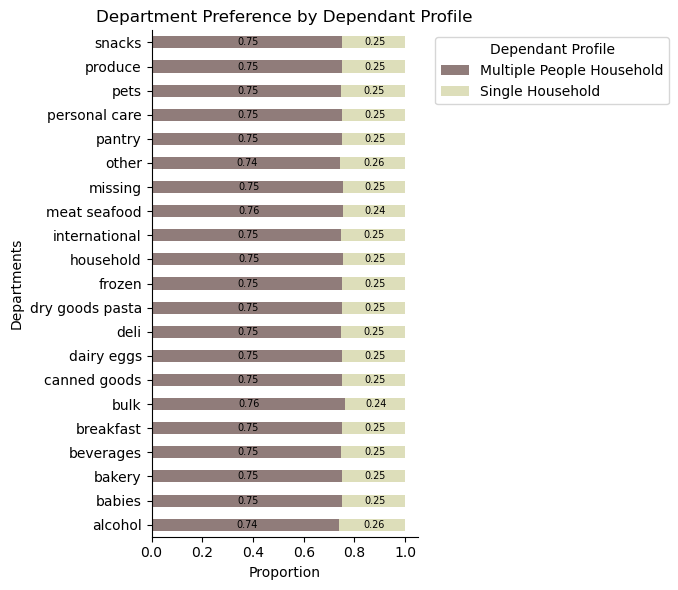

In [14]:
# Bar for departments and dependant profile

bar_dep_depend = dep_depend.plot.barh(stacked = True, title = 'Department Preference by Dependant Profile', color = colors, figsize=(7, 6))

plt.xlabel('Proportion')
plt.ylabel('Departments')

plt.legend(title='Dependant Profile', bbox_to_anchor=(1.04, 1))

# Display the values on top of each bar
for container in bar_dep_depend.containers:
    bar_dep_depend.bar_label(container, label_type="center", fmt="%.2f", fontsize=7, color='black', padding=1)

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [15]:
# Export bar chart
bar_dep_depend.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_departments_dependants.png'))

### 3.1.2 Customer Profiles and Regions

In [16]:
# Crosstab of region and age profile

age_reg = pd.crosstab(df['region'], df['age_profile'], normalize = 'index')

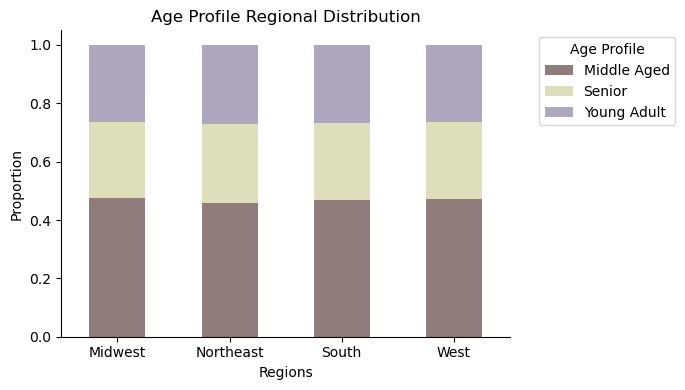

In [17]:
# Bar for region by age profile

bar_age_reg = age_reg.plot.bar(title='Age Profile Regional Distribution', stacked = True, color=colors, figsize=(7, 4))

plt.xlabel('Regions')
plt.ylabel('Proportion')

plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

plt.legend(title='Age Profile', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [18]:
# Export the bar chart

bar_age_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_profile_regions.png'))

In [19]:
# Crosstab to normalize regions and income profile

inc_reg = pd.crosstab(df['region'], df['income_profile'], normalize = 'index')

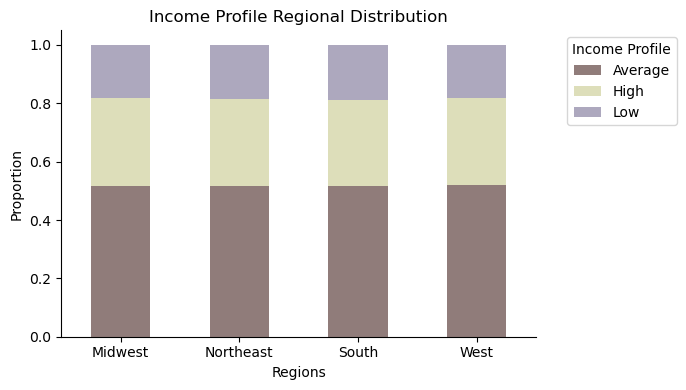

In [20]:
# Plot a bar chart for region and income profile

bar_inc_reg = inc_reg.plot.bar(title = 'Income Profile Regional Distribution', stacked = True, color=colors, figsize=(7, 4))

plt.xlabel('Regions')
plt.ylabel('Proportion')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

plt.legend(title='Income Profile', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [21]:
# Export the bar chart

bar_inc_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_profile_regions.png'))

In [22]:
# Crosstab to normalize regions and dependant profile

depend_reg = pd.crosstab(df['region'], df['dependants_profile'], normalize = 'index')

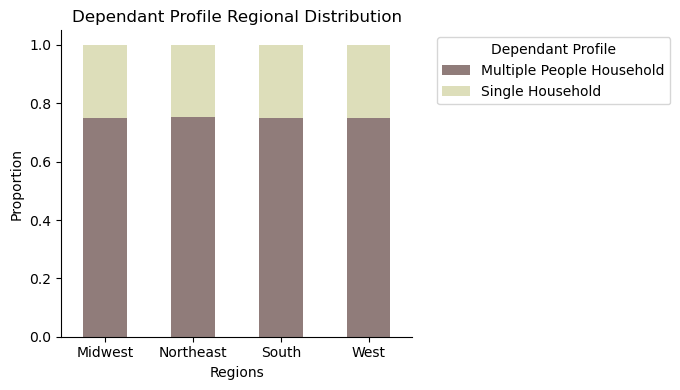

In [23]:
# Bar for regions and dependant profile

bar_depend_reg = depend_reg.plot.bar(title = 'Dependant Profile Regional Distribution', stacked = True, color=colors, figsize=(7, 4))

plt.xlabel('Regions')
plt.ylabel('Proportion')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

plt.legend(title='Dependant Profile', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [24]:
# Export the bar chart

bar_depend_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dependants_profile_regions.png'))

### 3.1.3 Customer Profiles and Frequency

In [25]:
# Crosstab to normalize frequency flag and age profile

age_freq = pd.crosstab(df['frequency_flag'], df['age_profile'], normalize = 'index')

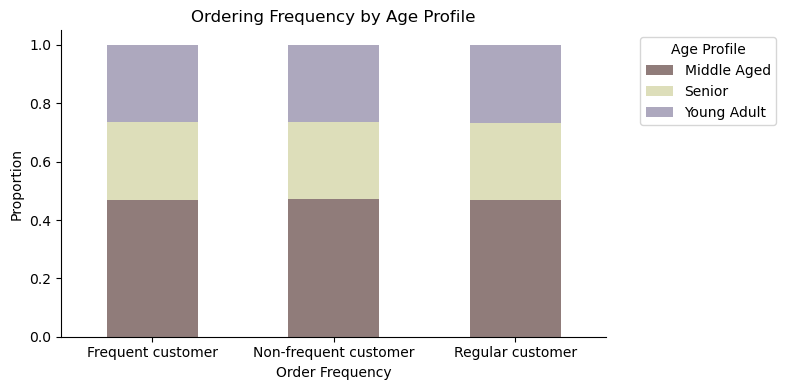

In [26]:
# Bar for frequency flag by age profile

bar_age_freq = age_freq.plot.bar(title='Ordering Frequency by Age Profile', stacked = True, color=colors, figsize=(8, 4))

plt.xlabel('Order Frequency')
plt.ylabel('Proportion')

plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

plt.legend(title='Age Profile', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [27]:
# Export the bar chart

bar_age_freq.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_profile_frequency_flag.png'))

In [28]:
# Crosstab to normalize frequency flag and income profile

inc_freq = pd.crosstab(df['frequency_flag'], df['income_profile'], normalize = 'index')

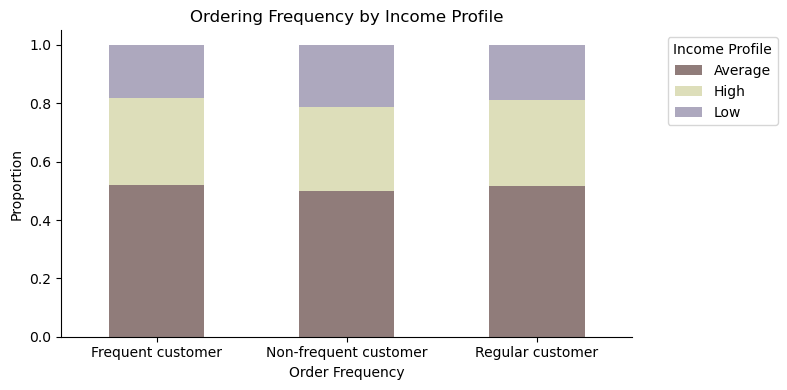

In [29]:
# Bar for frequency flag by income profile

bar_inc_freq = inc_freq.plot.bar(title='Ordering Frequency by Income Profile', stacked = True, color=colors, figsize=(8, 4))

plt.xlabel('Order Frequency')
plt.ylabel('Proportion')

plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

plt.legend(title='Income Profile', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [30]:
# Export the bar chart

bar_inc_freq.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_profile_frequency_flag.png'))

In [31]:
# Crosstab to normalize frequency flag and dependant profile

depend_freq = pd.crosstab(df['frequency_flag'], df['dependants_profile'], normalize = 'index')

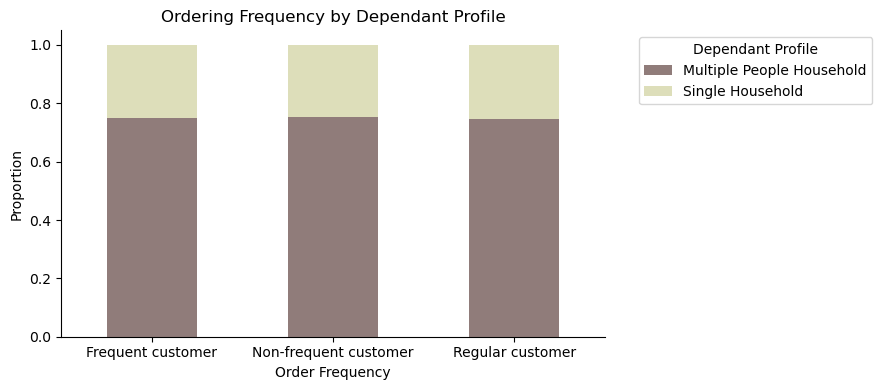

In [32]:
# Bar for frequency flag by dependant profile

bar_depend_freq = depend_freq.plot.bar(title='Ordering Frequency by Dependant Profile', stacked = True, color=colors, figsize=(9, 4))

plt.xlabel('Order Frequency')
plt.ylabel('Proportion')

plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

plt.legend(title='Dependant Profile', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [33]:
# Export the bar chart

bar_depend_freq.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dependant_profile_frequency_flag.png'))

### 3.1.4 Customer Profiles and Price Range

In [34]:
# Crosstab to normalize price-range and age profile

age_price = pd.crosstab(df['price_range_loc'], df['age_profile'], normalize = 'index')

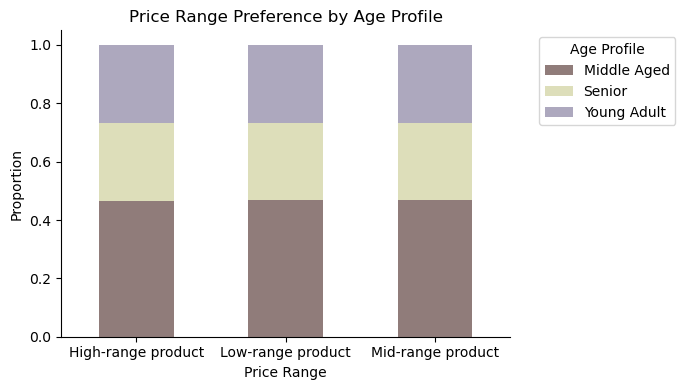

In [35]:
# Bar for price-range by age profile

bar_age_price = age_price.plot.bar(title='Price Range Preference by Age Profile', stacked = True, color=colors, figsize=(7, 4))

plt.xlabel('Price Range')
plt.ylabel('Proportion')

plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

plt.legend(title='Age Profile', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [36]:
# Export the bar chart

bar_age_price.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_profile_price_range.png'))

In [37]:
# Crosstab to normalize price-range and income profile

inc_price = pd.crosstab(df['price_range_loc'], df['income_profile'], normalize = 'index')

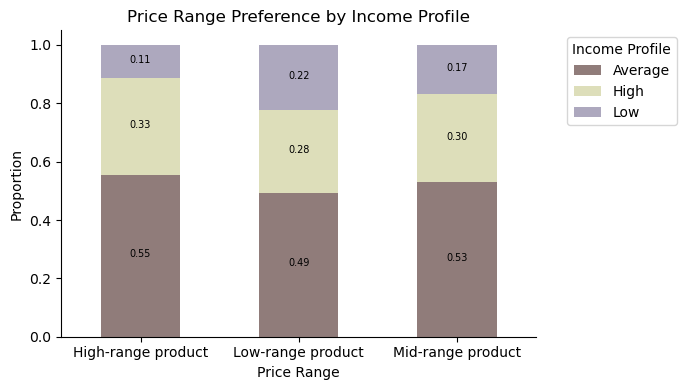

In [38]:
# Bar for price-range by income profile

bar_inc_price = inc_price.plot.bar(title='Price Range Preference by Income Profile', stacked = True, color=colors, figsize=(7, 4))

plt.xlabel('Price Range')
plt.ylabel('Proportion')

plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

plt.legend(title='Income Profile', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot

# Display the values on top of each bar
for container in bar_inc_price.containers:
    bar_inc_price.bar_label(container, label_type="center", fmt="%.2f", fontsize=7, color='black', padding=1)

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)


plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [39]:
# Export the bar chart

bar_inc_price.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_profile_price_range.png'))

In [40]:
# Crosstab to normalize price-range and dependant profile

depend_price = pd.crosstab(df['price_range_loc'], df['dependants_profile'], normalize = 'index')

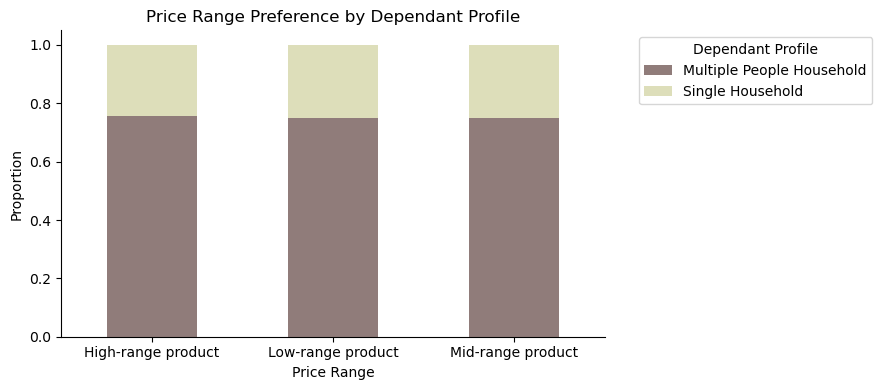

In [41]:
# Bar for price-range by dependant profile

bar_depend_price = depend_price.plot.bar(title='Price Range Preference by Dependant Profile', stacked = True, color=colors, figsize=(9, 4))

plt.xlabel('Price Range')
plt.ylabel('Proportion')

plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

plt.legend(title='Dependant Profile', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [42]:
# Export the bar chart

bar_depend_price.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dependant_profile_price_range.png'))

### 3.1.5 Customer Profiles and Spending Habits

In [43]:
# Crosstab to normalize spending flag and age profile

age_spend = pd.crosstab(df['spending_flag'], df['age_profile'], normalize = 'index')

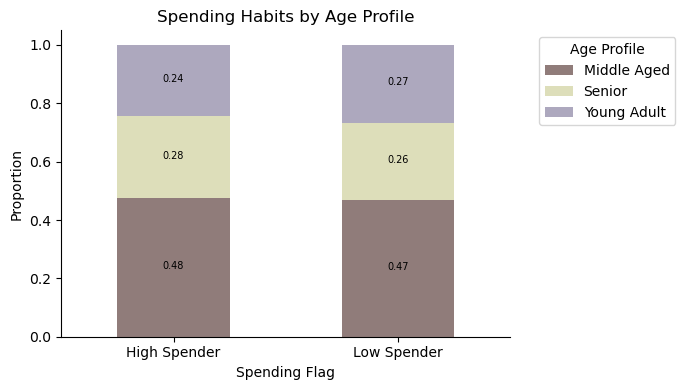

In [44]:
# Bar for spending flag by age profile

bar_age_spend = age_spend.plot.bar(title='Spending Habits by Age Profile', stacked = True, color=colors, figsize=(7, 4))

plt.xlabel('Spending Flag')
plt.ylabel('Proportion')

plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

plt.legend(title='Age Profile', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot

# Display the values on top of each bar
for container in bar_age_spend.containers:
    bar_age_spend.bar_label(container, label_type="center", fmt="%.2f", fontsize=7, color='black', padding=1)
    
# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [45]:
# Export the bar chart

bar_age_spend.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_profile_spending.png'))

In [46]:
# Crosstab to normalize spending flag and income profile

inc_spend = pd.crosstab(df['spending_flag'], df['income_profile'], normalize = 'index')

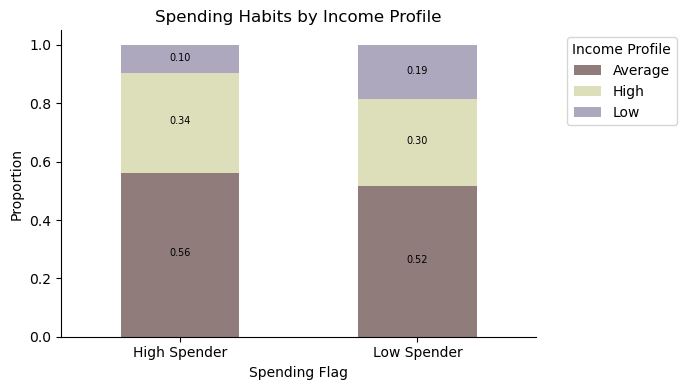

In [47]:
# Bar for spending flag by income profile

bar_inc_spend = inc_spend.plot.bar(title='Spending Habits by Income Profile', stacked = True, color=colors, figsize=(7, 4))

plt.xlabel('Spending Flag')
plt.ylabel('Proportion')

plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

plt.legend(title='Income Profile', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot

# Display the values on top of each bar
for container in bar_inc_spend.containers:
    bar_inc_spend.bar_label(container, label_type="center", fmt="%.2f", fontsize=7, color='black', padding=1)
    
# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [48]:
# Export the bar chart

bar_inc_spend.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_profile_spending.png'))

In [49]:
# Crosstab to normalize spending flag and dependant profile

dep_spend = pd.crosstab(df['spending_flag'], df['dependants_profile'], normalize = 'index')

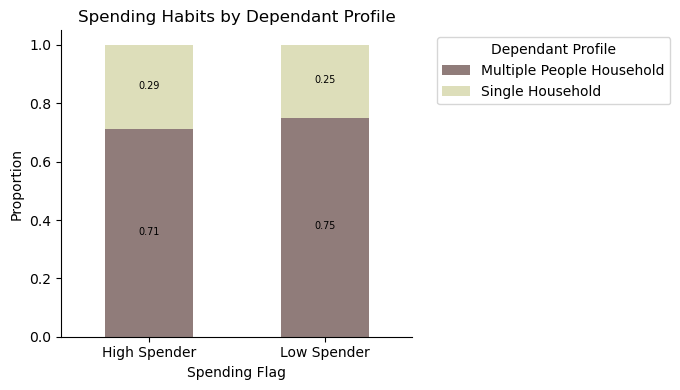

In [50]:
# Bar for spending flag by dependant profile

bar_dep_spend = dep_spend.plot.bar(title='Spending Habits by Dependant Profile', stacked = True, color=colors, figsize=(7, 4))

plt.xlabel('Spending Flag')
plt.ylabel('Proportion')

plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

plt.legend(title='Dependant Profile', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot

# Display the values on top of each bar
for container in bar_dep_spend.containers:
    bar_dep_spend.bar_label(container, label_type="center", fmt="%.2f", fontsize=7, color='black', padding=1)
    
# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [51]:
# Export the bar chart

bar_dep_spend.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dependant_profile_spending.png'))

### 3.1.6 Customer Profiles and Time

In [52]:
# Grouping Age Profile and order_hour_of_day

age_hour = pd.crosstab(index=df['order_hour_of_day'], columns=df['age_profile'])

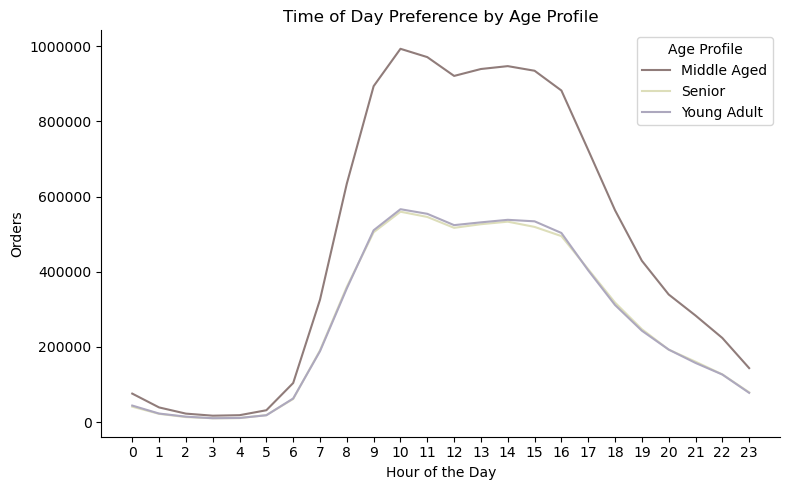

In [53]:
# Create the line chart

line_age_hour= age_hour.plot(kind='line', color=colors, figsize=(8, 5))

plt.xlabel('Hour of the Day')
plt.ylabel('Orders')
plt.title('Time of Day Preference by Age Profile')

plt.legend(title = 'Age Profile')

# Customize the Y-axis labels to display full integers
plt.gca().yaxis.set_major_formatter('{:.0f}'.format)

plt.xticks(range(24))  # Set x-axis ticks to show all hours (0 to 23)

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [54]:
# Export the line chart

line_age_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_time_of_day.png'))

In [55]:
# Grouping Age Profile and order_day_of_week

age_day = pd.crosstab(index=df['order_day_of_week'], columns=df['age_profile'])

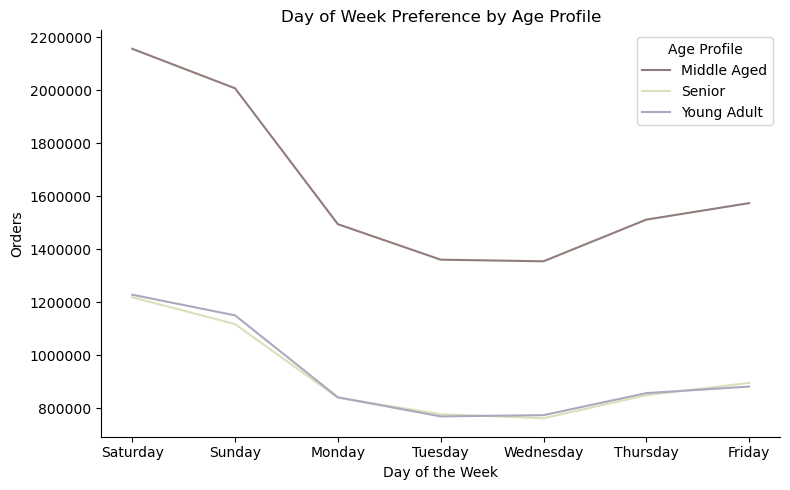

In [56]:
# Create the line chart

line_age_day= age_day.plot(kind='line', color=colors, figsize=(8, 5))

plt.xlabel('Day of the Week')
plt.ylabel('Orders')
plt.title('Day of Week Preference by Age Profile')

plt.legend(title = 'Age Profile')

# Customize the Y-axis labels to display full integers
plt.gca().yaxis.set_major_formatter('{:.0f}'.format)

# Define a dictionary to map numerical day values to day names
day_names = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'
}

# Use the 'day_names' dictionary to set the tick labels for the x-axis
plt.xticks(list(day_names.keys()), list(day_names.values()), rotation=0)

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [57]:
# Export the line chart

line_age_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_day_of_week.png'))

In [58]:
# Grouping Income Profile and order_hour_of_day

inc_hour = pd.crosstab(index=df['order_hour_of_day'], columns=df['income_profile'])

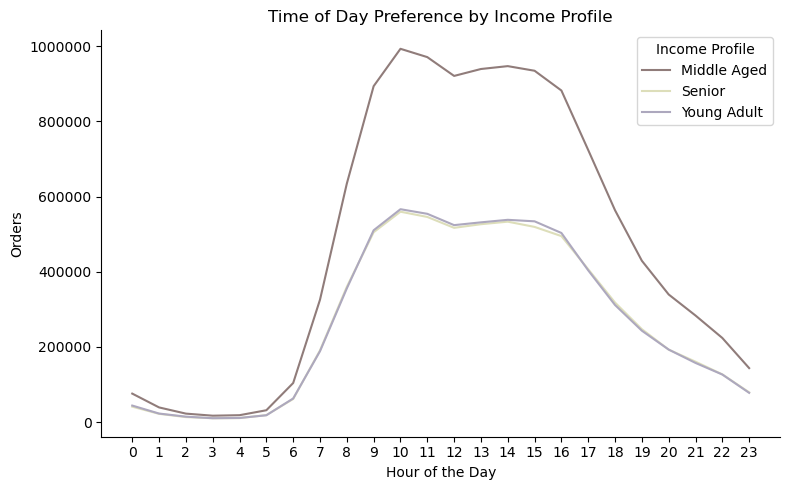

In [59]:
# Create the line chart

line_inc_hour= age_hour.plot(kind='line', color=colors, figsize=(8, 5))

plt.xlabel('Hour of the Day')
plt.ylabel('Orders')
plt.title('Time of Day Preference by Income Profile')

plt.legend(title = 'Income Profile')

# Customize the Y-axis labels to display full integers
plt.gca().yaxis.set_major_formatter('{:.0f}'.format)

plt.xticks(range(24))  # Set x-axis ticks to show all hours (0 to 23)

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [60]:
# Export the line chart

line_inc_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_income_time_of_day.png'))

In [61]:
# Grouping Income Profile and order_day_of_week

inc_day = pd.crosstab(index=df['order_day_of_week'], columns=df['income_profile'])

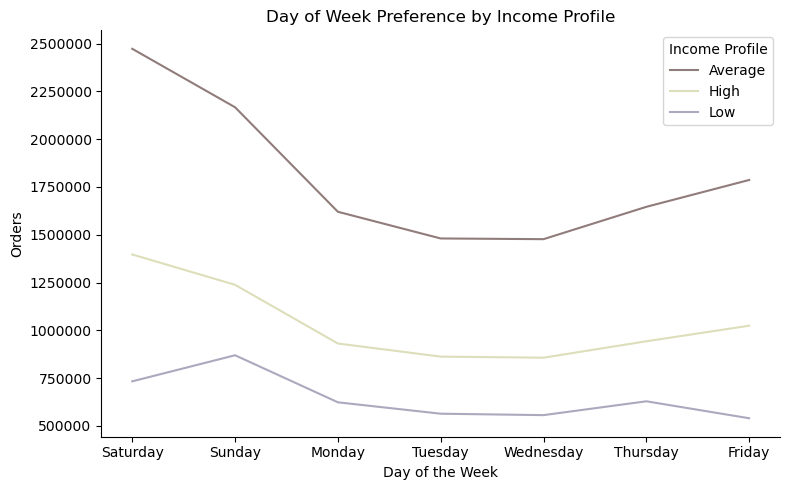

In [62]:
# Create the line chart

line_inc_day= inc_day.plot(kind='line', color=colors, figsize=(8, 5))

plt.xlabel('Day of the Week')
plt.ylabel('Orders')
plt.title('Day of Week Preference by Income Profile')

plt.legend(title = 'Income Profile')

# Customize the Y-axis labels to display full integers
plt.gca().yaxis.set_major_formatter('{:.0f}'.format)

# Define a dictionary to map numerical day values to day names
day_names = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'
}

# Use the 'day_names' dictionary to set the tick labels for the x-axis
plt.xticks(list(day_names.keys()), list(day_names.values()), rotation=0)

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [63]:
# Export the line chart

line_inc_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_income_day_of_week.png'))

In [64]:
# Grouping Dependant Profile and order_hour_of_day

dep_hour = pd.crosstab(index=df['order_hour_of_day'], columns=df['dependants_profile'])

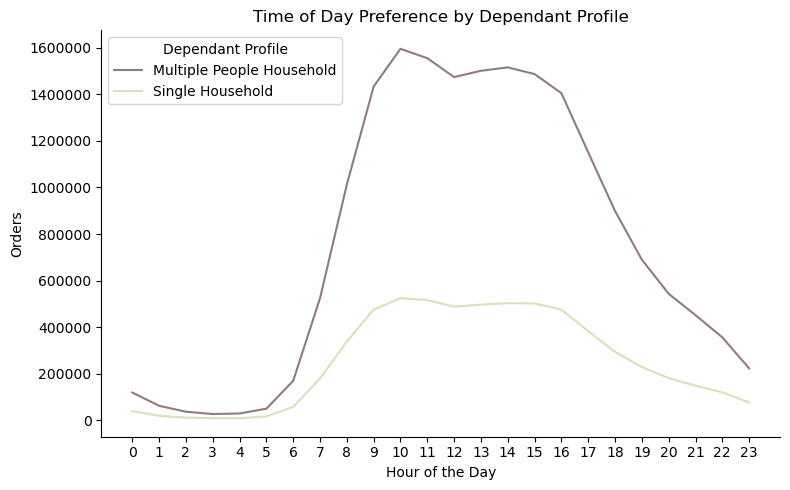

In [65]:
# Create the line chart

line_dep_hour= dep_hour.plot(kind='line', color=colors, figsize=(8, 5))

plt.xlabel('Hour of the Day')
plt.ylabel('Orders')
plt.title('Time of Day Preference by Dependant Profile')

plt.legend(title = 'Dependant Profile')

# Customize the Y-axis labels to display full integers
plt.gca().yaxis.set_major_formatter('{:.0f}'.format)

plt.xticks(range(24))  # Set x-axis ticks to show all hours (0 to 23)

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [66]:
# Export the line chart

line_dep_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_dependants_hour_of_day.png'))

In [67]:
# Grouping Dependant Profile and order_day_of_week

dep_day = pd.crosstab(index=df['order_day_of_week'], columns=df['dependants_profile'])

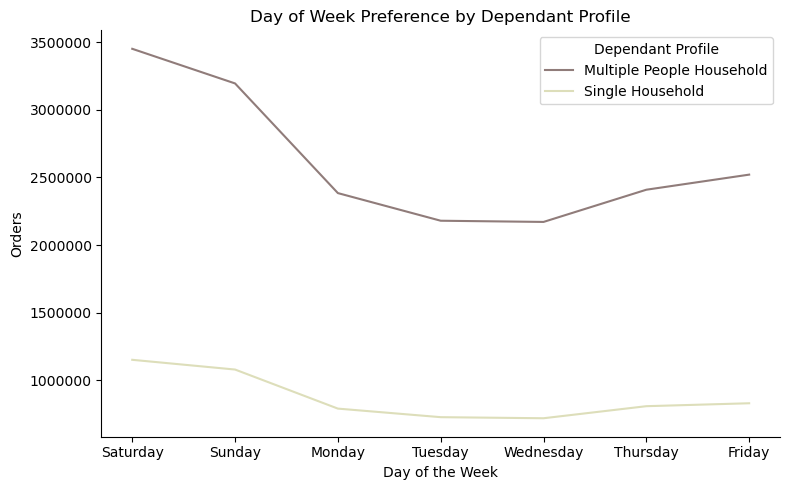

In [68]:
# Create the line chart

line_dep_day= dep_day.plot(kind='line', color=colors, figsize=(8, 5))

plt.xlabel('Day of the Week')
plt.ylabel('Orders')
plt.title('Day of Week Preference by Dependant Profile')

plt.legend(title = 'Dependant Profile')

# Customize the Y-axis labels to display full integers
plt.gca().yaxis.set_major_formatter('{:.0f}'.format)

# Define a dictionary to map numerical day values to day names
day_names = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'
}

# Use the 'day_names' dictionary to set the tick labels for the x-axis
plt.xticks(list(day_names.keys()), list(day_names.values()), rotation=0)

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [69]:
# Export the line chart

line_dep_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_dependants_day_of_week.png'))

[BACK TO TOP](#Table-of-Contents)

## 3.2 Loyalty Profile Ordering Habits

### 3.2.1 Loyalty and Departments

In [70]:
# Creating a crosstab for Departments and loyalty

loy_dep = pd.crosstab(df['department_name'], df['loyalty_flag'])

In [71]:
# Sort the departments based on the total order count in descending order
loy_dep = loy_dep.loc[loy_dep.sum(axis=1).sort_values(ascending=True).index]

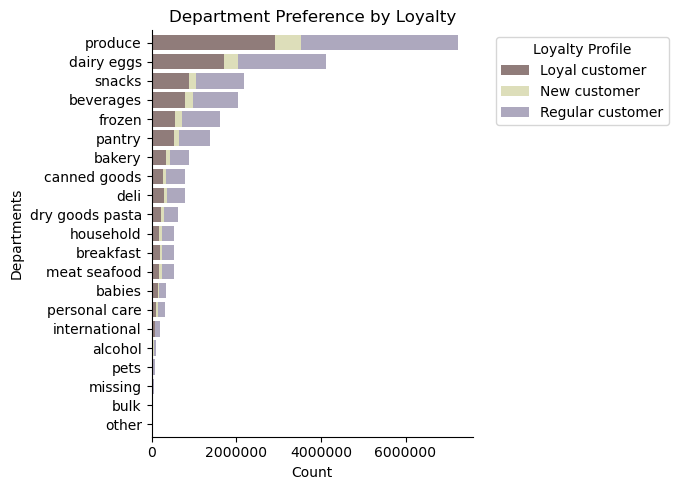

In [72]:
# Plot the bar chart

bar_loy_dep = loy_dep.plot.barh(stacked=True, title='Department Preference by Loyalty', color=colors, width=0.8, figsize=(7, 5))

plt.xlabel('Count')
plt.ylabel('Departments')

plt.legend(title='Loyalty Profile', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot

# Customize the X-axis labels to display full integers
plt.gca().xaxis.set_major_formatter('{:.0f}'.format)

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [73]:
# Export the bar chart

bar_loy_dep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_departments_loyalty.png'))

In [74]:
# Creating a crosstab to normalize Departments and loyalty

loy_dep_norm = pd.crosstab(df['department_name'], df['loyalty_flag'], normalize = 'index')

In [75]:
# Sort the departments based on the total order count in descending order
loy_dep_norm = loy_dep_norm.loc[loy_dep.sum(axis=1).sort_values(ascending=True).index]

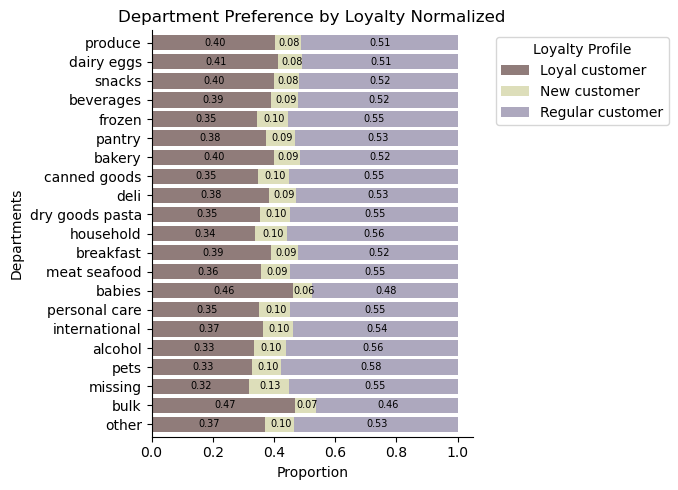

In [76]:
# Plot the bar chart

bar_loy_dep_norm = loy_dep_norm.plot.barh(stacked=True, title='Department Preference by Loyalty Normalized', color=colors, width=0.8, figsize=(7, 5))

plt.xlabel('Proportion')
plt.ylabel('Departments')

plt.legend(title='Loyalty Profile', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot

# Display the values on top of each bar
for container in bar_loy_dep_norm.containers:
    bar_loy_dep_norm.bar_label(container, label_type="center", fmt="%.2f", fontsize=7, color='black', padding=1)

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [77]:
# Export the bar chart

bar_loy_dep_norm.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_departments_loyalty_normalized.png'))

### 3.2.2 Loyalty and Spending Flag

In [78]:
# Grouping customer loyalty and spending habits

loy_spend = pd.crosstab(df['spending_flag'], df['loyalty_flag'])

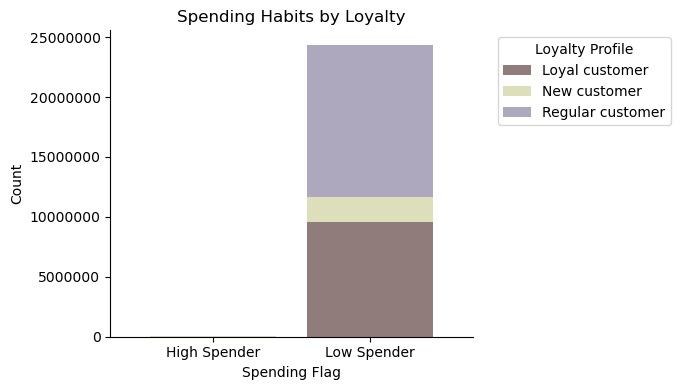

In [79]:
# Plot the bar chart

bar_loy_spend = loy_spend.plot.bar(stacked=True, title='Spending Habits by Loyalty', color=colors, width=0.8, figsize=(7,4))
plt.xlabel('Spending Flag')
plt.ylabel('Count')

plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

# Customize the Y-axis labels to display full integers
plt.gca().yaxis.set_major_formatter('{:.0f}'.format)

plt.legend(title='Loyalty Profile', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout() 

plt.show()

In [80]:
# Export the bar chart

bar_loy_spend.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_total_spend.png'))

In [81]:
# Grouping customer loyalty and spending habits and normalizing it

loy_spend_norm = pd.crosstab(df['spending_flag'], df['loyalty_flag'], normalize = 'index')

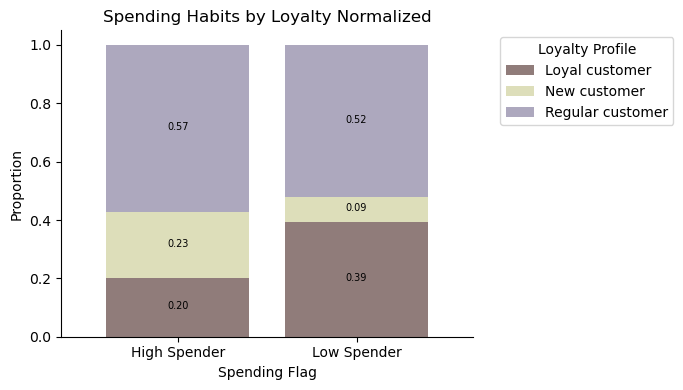

In [82]:
# Plot the bar chart

bar_loy_spend_norm = loy_spend_norm.plot.bar(stacked=True, title='Spending Habits by Loyalty Normalized', color=colors, width=0.8, figsize=(7,4))
plt.xlabel('Spending Flag')
plt.ylabel('Proportion')

plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

plt.legend(title='Loyalty Profile', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot

# Display the values on top of each bar
for container in bar_loy_spend_norm.containers:
    bar_loy_spend_norm.bar_label(container, label_type="center", fmt="%.2f", fontsize=7, color='black', padding=1)

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout() 

plt.show()

In [83]:
# Export the bar chart

bar_loy_spend_norm.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_total_spend_normalized.png'))

### 3.2.3 Loyalty and Frequency

In [84]:
# Grouping customer loyalty and frequency

loy_freq = pd.crosstab(df['frequency_flag'], df['loyalty_flag'])

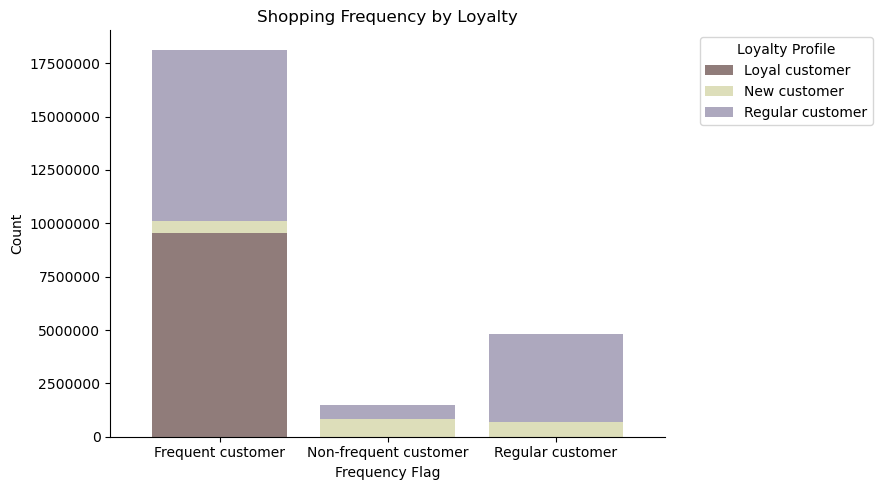

In [85]:
# Plot the bar chart

bar_loy_freq = loy_freq.plot.bar(stacked=True, title='Shopping Frequency by Loyalty', color=colors, width=0.8, figsize=(9,5))
plt.xlabel('Frequency Flag')
plt.ylabel('Count')

plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

plt.legend(title='Loyalty Profile', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot

# Customize the Y-axis labels to display full integers
plt.gca().yaxis.set_major_formatter('{:.0f}'.format)

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout() 

plt.show()

In [86]:
# Export the bar chart

bar_loy_freq.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_frequency.png'))

In [87]:
# Grouping customer loyalty and frequency and normalizing it

loy_freq_norm = pd.crosstab(df['frequency_flag'], df['loyalty_flag'], normalize = 'index')

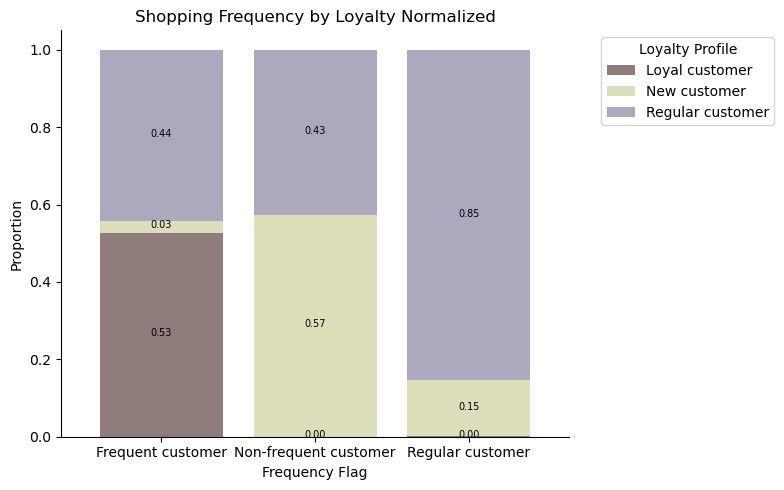

In [88]:
# Plot the bar chart

bar_loy_freq_norm = loy_freq_norm.plot.bar(stacked=True, title='Shopping Frequency by Loyalty Normalized', color=colors, width=0.8, figsize=(8,5))
plt.xlabel('Frequency Flag')
plt.ylabel('Proportion')


plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

plt.legend(title='Loyalty Profile', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot

# Display the values on top of each bar
for container in bar_loy_freq_norm.containers:
    bar_loy_freq_norm.bar_label(container, label_type="center", fmt="%.2f", fontsize=7, color='black', padding=1)

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout() 

plt.show()

In [89]:
# Export the bar chart

bar_loy_freq_norm.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_frequency_normalized.png'))

### 3.2.4 Loyalty and Time

In [90]:
# Grouping Loyalty Status and order_hour_of_day

cross_loy_hour = pd.crosstab(index=df['order_hour_of_day'], columns=df['loyalty_flag'])

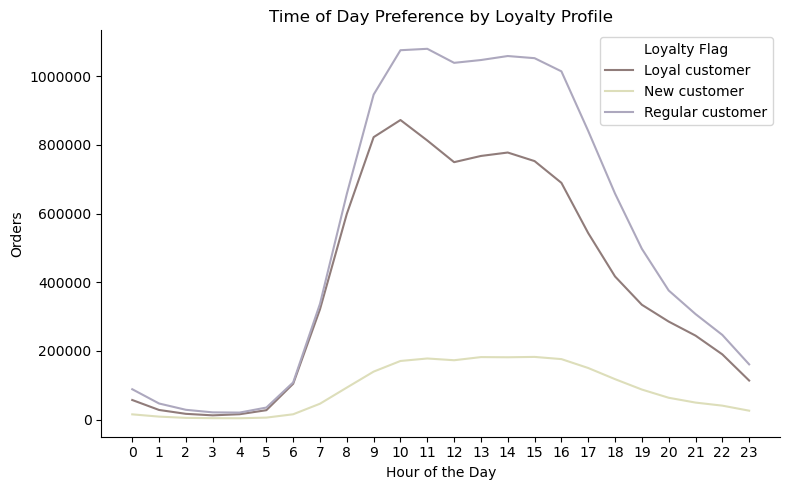

In [91]:
# Create the line chart

line_loy_hour= cross_loy_hour.plot(kind='line', color=colors, figsize=(8, 5))

plt.xlabel('Hour of the Day')
plt.ylabel('Orders')
plt.title('Time of Day Preference by Loyalty Profile')

plt.legend(title = 'Loyalty Flag')

# Customize the Y-axis labels to display full integers
plt.gca().yaxis.set_major_formatter('{:.0f}'.format)

plt.xticks(range(24))  # Set x-axis ticks to show all hours (0 to 23)

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [92]:
# Export the line chart

line_loy_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_loyalty_time_of_day.png'))

In [93]:
# Grouping Loyalty Status and order_day_of_week

cross_loy_day = pd.crosstab(index=df['order_day_of_week'], columns=df['loyalty_flag'])

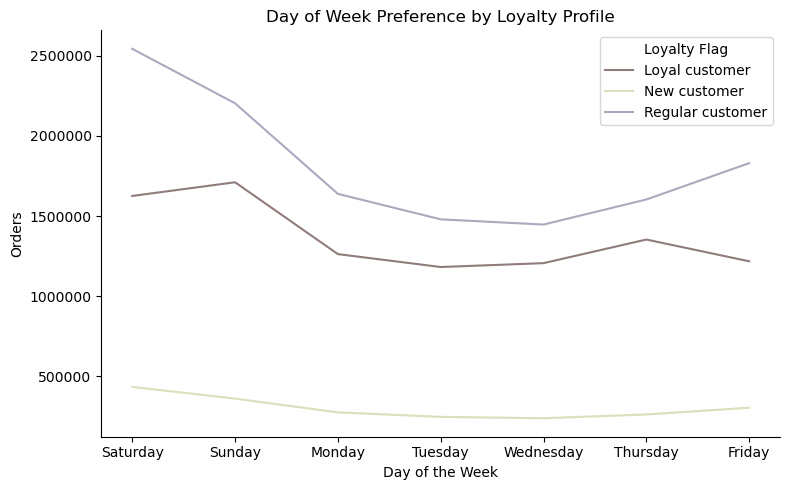

In [94]:
# Create the line chart

line_loy_day= cross_loy_day.plot(kind='line', color=colors, figsize=(8, 5))

plt.xlabel('Day of the Week')
plt.ylabel('Orders')
plt.title('Day of Week Preference by Loyalty Profile')

plt.legend(title = 'Loyalty Flag')

# Customize the Y-axis labels to display full integers
plt.gca().yaxis.set_major_formatter('{:.0f}'.format)

# Define a dictionary to map numerical day values to day names
day_names = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'
}

# Use the 'day_names' dictionary to set the tick labels for the x-axis
plt.xticks(list(day_names.keys()), list(day_names.values()), rotation=0)

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [95]:
# Export the bar chart

line_loy_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_loyalty_day_of_week.png'))

### 3.2.5 Loyalty and Price Range

In [96]:
# Crosstab of price range and loyalty flag

loy_price = pd.crosstab(df['price_range_loc'], df['loyalty_flag'], normalize = 'index')

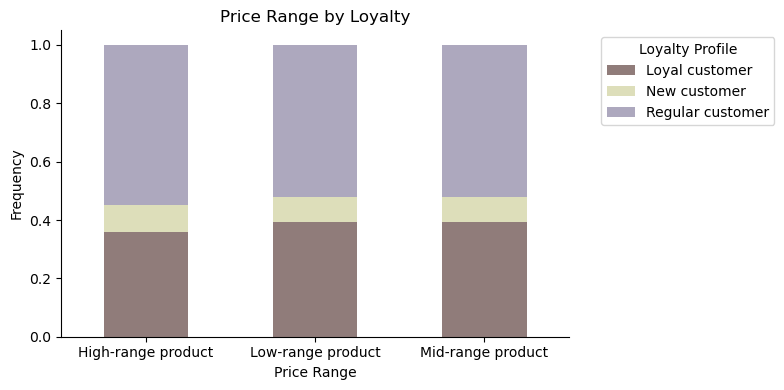

In [97]:
# Plot the bar chart for price categories

bar_loy_price = loy_price.plot.bar(stacked=True, title='Price Range by Loyalty', color=colors, figsize=(8,4))

plt.xlabel('Price Range')
plt.ylabel('Frequency')

plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

plt.legend(title='Loyalty Profile', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [98]:
# Export the bar chart

bar_loy_price.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_price_range.png'))

[BACK TO TOP](#Table-of-Contents)

## 3.3 Regional Ordering Habits

### 3.3.1 Regions and Departments

In [99]:
# Creating a crosstab to normalize regional department preference

dep_reg = pd.crosstab(df['department_name'], df['region'], normalize = 'index')

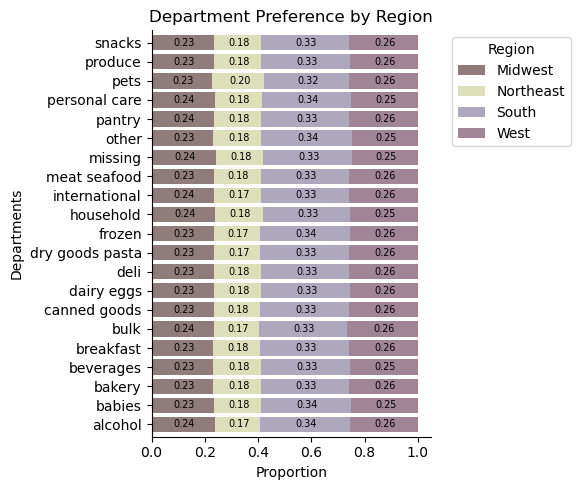

In [100]:
# Plot the bar chart

bar_dep_reg = dep_reg.plot.barh(stacked=True, title='Department Preference by Region', color=colors, width=0.8, figsize=(6, 5))

plt.xlabel('Proportion')
plt.ylabel('Departments')

plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot

# Display the values on top of each bar
for container in bar_dep_reg.containers:
   bar_dep_reg.bar_label(container, label_type="center", fmt="%.2f", fontsize=7, color='black', padding=1)

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [101]:
# Export the bar chart

bar_dep_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_departments_regions.png'))

### 3.3.2 Regions and Frequency

In [102]:
# Crosstab of frequency and regions

reg_freq = pd.crosstab(df['frequency_flag'], df['region'], normalize = 'index')

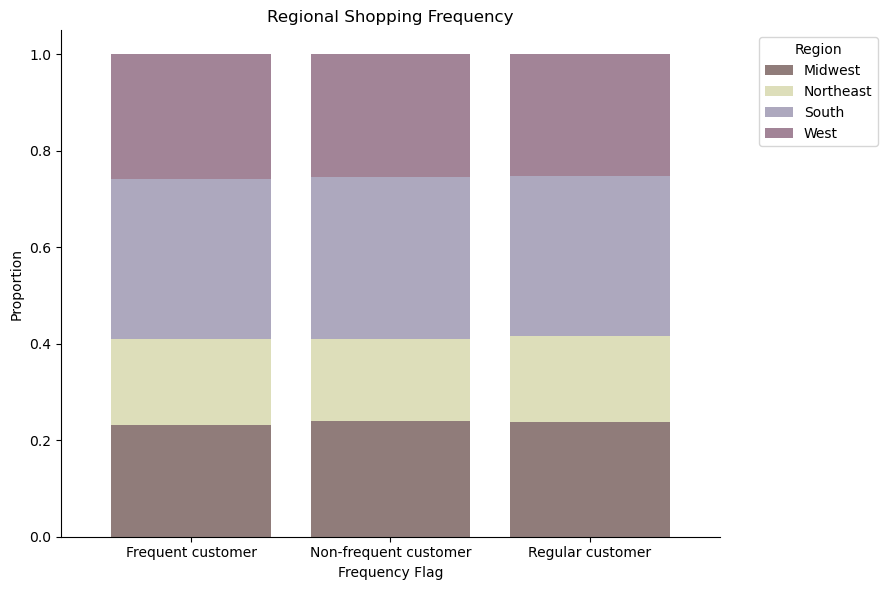

In [103]:
# bar chart regions and frequency flag

bar_reg_freq = reg_freq.plot.bar(stacked=True, title='Regional Shopping Frequency', color=colors, width=0.8, figsize=(9,6))

plt.xlabel('Frequency Flag')
plt.ylabel('Proportion')

plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()



In [104]:
# Export the bar chart

bar_reg_freq.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_frequency_flag.png'))

### 3.3.3 Regions and Price Range

In [105]:
# Crosstab of Price-range and regions

price_reg = pd.crosstab(df['price_range_loc'], df['region'], normalize = 'index')

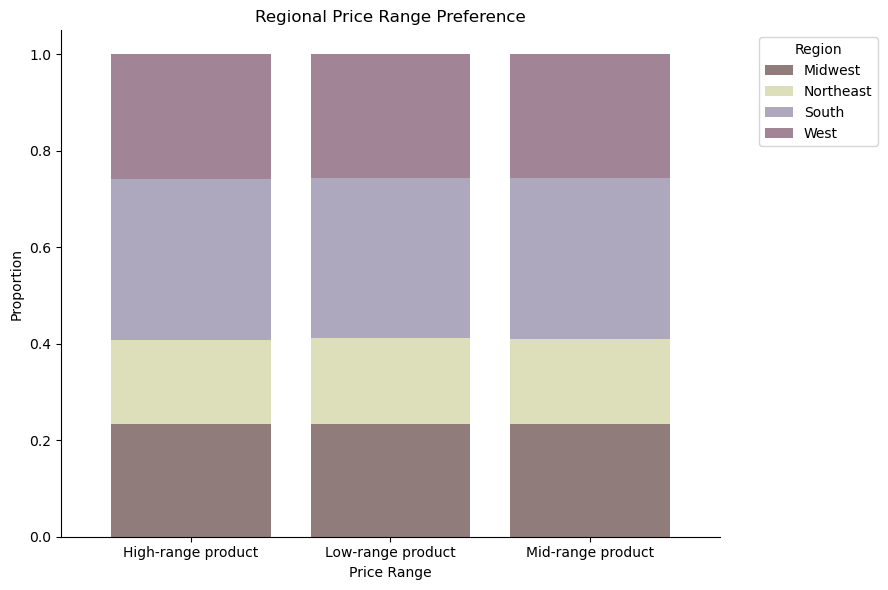

In [106]:
# bar chart regions and price range flag

bar_price_reg = price_reg.plot.bar(stacked=True, title='Regional Price Range Preference', color=colors, width=0.8, figsize=(9,6))

plt.xlabel('Price Range')
plt.ylabel('Proportion')

plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [107]:
# Export the bar chart

bar_price_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_price_range.png'))

### 3.3.4 Regions and Time

In [108]:
# Grouping regions and order_hour_of_day

cross_reg_hour = pd.crosstab(index=df['order_hour_of_day'], columns=df['region'])

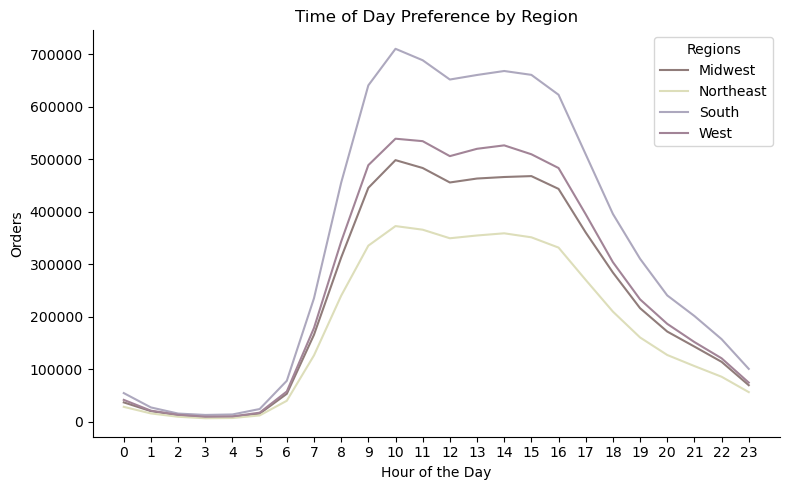

In [109]:
# Create the line chart

line_reg_hour= cross_reg_hour.plot(kind='line', color=colors, figsize=(8, 5))

plt.xlabel('Hour of the Day')
plt.ylabel('Orders')
plt.title('Time of Day Preference by Region')

plt.legend(title = 'Regions')

# Customize the Y-axis labels to display full integers
plt.gca().yaxis.set_major_formatter('{:.0f}'.format)

plt.xticks(range(24))  # Set x-axis ticks to show all hours (0 to 23)

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [110]:
# Export the line chart

line_reg_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_region_hour_of_day.png'))

In [111]:
# Grouping regions and order_day_of_week

cross_reg_day = pd.crosstab(index=df['order_day_of_week'], columns=df['region'])

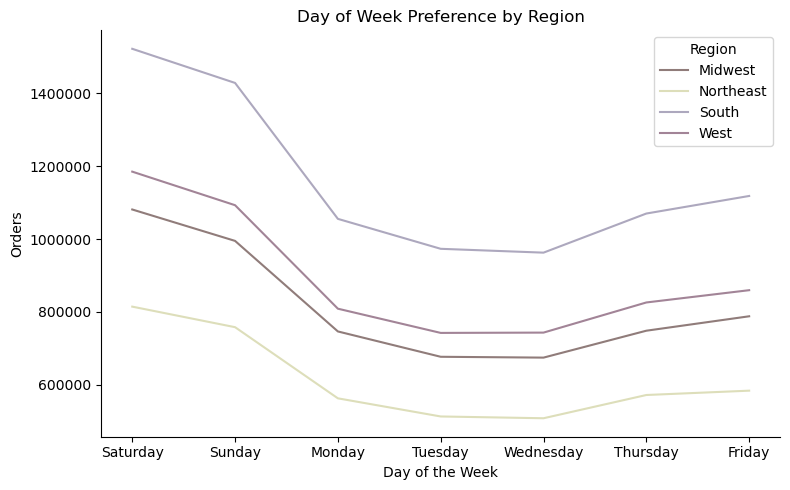

In [112]:
# Create the line chart

line_reg_day= cross_reg_day.plot(kind='line', color=colors, figsize=(8, 5))

plt.xlabel('Day of the Week')
plt.ylabel('Orders')
plt.title('Day of Week Preference by Region')

plt.legend(title = 'Region')

# Customize the Y-axis labels to display full integers
plt.gca().yaxis.set_major_formatter('{:.0f}'.format)

# Define a dictionary to map numerical day values to day names
day_names = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'
}

# Use the 'day_names' dictionary to set the tick labels for the x-axis
plt.xticks(list(day_names.keys()), list(day_names.values()), rotation=0)

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [113]:
# Export the line chart

line_reg_bday.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_region_day_of_week.png'))

NameError: name 'line_reg_bday' is not defined

[BACK TO TOP](#Table-of-Contents)

## 3.4 Age and Fam Status Ordering Habits

In [ ]:
# Crosstab of Age and Family Status

age_fam = pd.crosstab(df['fam_status'], df['age_profile'])

In [ ]:
# Plot the bar chart of Age and Family Status crosstab

bar_age_fam = age_fam.plot.bar(stacked=False, title='Age Profile and Family Status', color=colors, width=0.8, figsize=(9,6))

plt.xlabel('Family Status')
plt.ylabel('Count')

# Customize the Y-axis labels to display full integers
plt.gca().yaxis.set_major_formatter('{:.0f}'.format)

plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

plt.legend(title='Age Profile', loc='upper right')

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [ ]:
# To check if there is a connection between age and family status in terms of ordering habits, 
# we need to create Customer Profiles based on these variables

df.loc[(df['fam_status'] == 'divorced/widowed') & (df['age_profile'] == 'Young Adult'), 'age_fam_customer_profile'] = 'Young Divorcee/Widow'
df.loc[(df['fam_status'] == 'divorced/widowed') & (df['age_profile'] == 'Middle Aged'), 'age_fam_customer_profile'] = 'Middle-Aged Divorcee/Widow'
df.loc[(df['fam_status'] == 'divorced/widowed') & (df['age_profile'] == 'Senior'), 'age_fam_customer_profile'] = 'Senior Divorcee/Widow'
df.loc[(df['fam_status'] == 'living with parents and siblings') & (df['age_profile'] == 'Young Adult'), 'age_fam_customer_profile'] = 'Young Lives With Parents'
df.loc[(df['fam_status'] == 'living with parents and siblings') & (df['age_profile'] == 'Middle Aged'), 'age_fam_customer_profile'] = 'Middle-Aged Lives With Parents'
df.loc[(df['fam_status'] == 'living with parents and siblings') & (df['age_profile'] == 'Senior'), 'age_fam_customer_profile'] = 'Senior Lives With Parents'
df.loc[(df['fam_status'] == 'married') & (df['age_profile'] == 'Young Adult'), 'age_fam_customer_profile'] = 'Young Married'
df.loc[(df['fam_status'] == 'married') & (df['age_profile'] == 'Middle Aged'), 'age_fam_customer_profile'] = 'Middle-Aged Married'
df.loc[(df['fam_status'] == 'married') & (df['age_profile'] == 'Senior'), 'age_fam_customer_profile'] = 'Senior Married'
df.loc[(df['fam_status'] == 'single') & (df['age_profile'] == 'Young Adult'), 'age_fam_customer_profile'] = 'Young Single'
df.loc[(df['fam_status'] == 'single') & (df['age_profile'] == 'Middle Aged'), 'age_fam_customer_profile'] = 'Middle-Aged Single'
df.loc[(df['fam_status'] == 'single') & (df['age_profile'] == 'Senior'), 'age_fam_customer_profile'] = 'Senior Single'

In [ ]:
df['age_fam_customer_profile'].value_counts(dropna=False)

### 3.4.1 Age-Fam Profile and Departments

In [ ]:
# Expanding the color palette

colors1 = ['#907C7A','#DDDEBA','#C5C3BC', '#5C2751', '#273E47', '#4B644A', '#798681', '#686963']

In [ ]:
# Creating a crosstab to normalize Age-Fam Profile and Departments

age_fam_dep = pd.crosstab(df['department_name'], df['age_fam_customer_profile'], normalize = 'index')

In [ ]:
# Plot the bar chart

bar_age_fam_dep = age_fam_dep.plot.barh(stacked=True, title='Department Preference by Age-Fam Profile', color=colors1, width=0.8, figsize=(17, 7))

plt.xlabel('Proportion')
plt.ylabel('Departments')

plt.legend(title='Age-Fam Profile', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot

# Display the values on top of each bar
for container in bar_age_fam_dep.containers:
    bar_age_fam_dep.bar_label(container, label_type="center", fmt="%.2f", fontsize=9, color='black', padding=1)

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [ ]:
# Export the bar chart

bar_age_fam_dep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_fam_status_departments.png'))

### 3.4.2 Age-Fam Profile and Spending Flag

In [ ]:
# Creating a crosstab to normalize Age-Fam Profile and Spending Flag

age_fam_spend = pd.crosstab(df['spending_flag'], df['age_fam_customer_profile'], normalize = 'index')

In [ ]:
# Sort the columns based on the counts, in order to get the lengend to show values in descending order

sorted_columns = age_fam_spend.sum().sort_values(ascending=False).index.tolist()
age_fam_spend = age_fam_spend[sorted_columns]

In [ ]:
# Plot the bar chart

bar_age_fam_spend = age_fam_spend.plot.bar(stacked=True, title='Spending Habits by Age-Fam Profile', color=colors1, width=0.8, figsize=(7,6))
plt.xlabel('Spending Flag')
plt.ylabel('Proportion')

plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

# Display the values on top of each bar
for container in bar_age_fam_spend.containers:
   bar_age_fam_spend.bar_label(container, label_type="center", fmt="%.2f", fontsize=9, color='black', padding=1)

# get current handles and lables
current_handles, current_labels = plt.gca().get_legend_handles_labels()

# sort or reorder the labels and handles
reversed_handles = list(reversed(current_handles))
reversed_labels = list(reversed(current_labels))

# call the legend with the new values
plt.legend(reversed_handles,reversed_labels, title='Age-Fam Profile', bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout() 

plt.show()

In [ ]:
# Export the bar chart

bar_age_fam_spend.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_fam_status_spending_flag.png'))

### 3.2.3 Age-Fam Profile and Frequency

In [ ]:
# Creating a crosstab to normalize Age-Fam Profile and Frequency

age_fam_freq = pd.crosstab(df['frequency_flag'], df['age_fam_customer_profile'], normalize = 'index')

In [ ]:
# Sort the columns of age_fam_freq based on the total proportion in descending order

sorted_columns = age_fam_freq.sum().sort_values(ascending=False).index.tolist()
age_fam_freq = age_fam_freq[sorted_columns]

In [ ]:
# Plot the bar chart

bar_age_fam_freq = age_fam_freq.plot.bar(stacked=True, title='Shopping Frequency by Age-Fam Profile', color=colors1, width=0.8, figsize=(9,7))
plt.xlabel('Shopping Frequency')
plt.ylabel('Proportion')

# Display the values on top of each bar
for container in bar_age_fam_freq.containers:
    bar_age_fam_freq.bar_label(container, label_type="center", fmt="%.2f", fontsize=9, color='black', padding=1)

plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

# get current handles and lables
current_handles, current_labels = plt.gca().get_legend_handles_labels()

# sort or reorder the labels and handles
reversed_handles = list(reversed(current_handles))
reversed_labels = list(reversed(current_labels))

# call the legend with the new values
plt.legend(reversed_handles,reversed_labels, title='Age-Fam Profile', bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout() 

plt.show()

In [ ]:
# Export the bar chart

bar_age_fam_freq.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_fam_status_frequency.png'))

### 3.4.4 Age-Fam Profile and Price Range

In [ ]:
# Creating a crosstab to normalize Age-Fam Profile and Price Range

age_fam_price = pd.crosstab(df['price_range_loc'], df['age_fam_customer_profile'], normalize = 'index')

In [ ]:
# Sort the columns based on the total proportion in descending order

sorted_columns = age_fam_price.sum().sort_values(ascending=False).index.tolist()
age_fam_price = age_fam_price[sorted_columns]

In [ ]:
# Plot the bar chart

bar_age_fam_price = age_fam_price.plot.bar(stacked=True, title='Price Range Preference by Age-Fam Profile', color=colors1, width=0.8, figsize=(9,7))
plt.xlabel('Price Range')
plt.ylabel('Proportion')

# Display the values on top of each bar
for container in bar_age_fam_price.containers:
    bar_age_fam_price.bar_label(container, label_type="center", fmt="%.2f", fontsize=9, color='black', padding=1)

plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

# get current handles and lables
current_handles, current_labels = plt.gca().get_legend_handles_labels()

# sort or reorder the labels and handles
reversed_handles = list(reversed(current_handles))
reversed_labels = list(reversed(current_labels))

# call the legend with the new values
plt.legend(reversed_handles,reversed_labels, title='Age-Fam Profile', bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout() 

plt.show()

In [ ]:
# Export the bar chart

bar_age_fam_price.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_fam_status_price_range.png'))

### 3.4.5 Age-Fam Profile and Time

In [ ]:
# Grouping Age-Fam Profile and order_hour_of_day

age_fam_hour = pd.crosstab(index=df['order_hour_of_day'], columns=df['age_fam_customer_profile'])

In [ ]:
# Calculate the total count for each Age-Fam Profile and sort the columns based on the counts, in order to get the lengend to show values in descending order

sorted_columns = age_fam_hour.sum().sort_values(ascending=False).index.tolist()
age_fam_hour = age_fam_hour[sorted_columns]

In [ ]:
# Create the line chart

line_age_fam_hour= age_fam_hour.plot(kind='line', color=colors1, figsize=(10, 5))

plt.xlabel('Hour of the Day')
plt.ylabel('Orders')
plt.title('Time of Day Preference by Age-Fam Profile')

plt.legend(title = 'Age-Fam Profile', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot

plt.gca().yaxis.set_major_formatter('{:.0f}'.format) # Customize the Y-axis labels to display full integers

plt.xticks(range(24))  # Set x-axis ticks to show all hours (0 to 23)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [ ]:
# Export the line chart

line_age_fam_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_fam_status_hour_of_day.png'))

In [ ]:
# Grouping Age-Fam Profile and order_day_of_week

age_fam_day = pd.crosstab(index=df['order_day_of_week'], columns=df['age_fam_customer_profile'])

In [ ]:
# Calculate the total count for each Age-Fam Profile and sort the columns based on the counts, in order to get the lengend to show values in descending order

sorted_columns = age_fam_day.sum().sort_values(ascending=False).index.tolist()
age_fam_day = age_fam_day[sorted_columns]

In [ ]:
# Create the line chart

line_age_fam_day= age_fam_day.plot(kind='line', color=colors1, figsize=(10, 5))

plt.xlabel('Day of the Week')
plt.ylabel('Orders')
plt.title('Day of Week Preference by Age-Fam Profile')

plt.legend(title = 'Age-Fam Profile', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot

# Customize the Y-axis labels to display full integers
plt.gca().yaxis.set_major_formatter('{:.0f}'.format)

# Define a dictionary to map numerical day values to day names
day_names = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'
}

# Use the 'day_names' dictionary to set the tick labels for the x-axis
plt.xticks(list(day_names.keys()), list(day_names.values()), rotation=0)

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [ ]:
# Export the line chart

line_age_fam_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_fam_status_day_of_week.png'))

[BACK TO TOP](#Table-of-Contents)

## 3.5 Other Viz

### 3.5.1 Price Range Frequency

In [ ]:
# Price range frequency

price_range_freq = df['price_range_loc'].value_counts(dropna = False)

In [ ]:
# plot bar chart

bar_price_range_freq = price_range_freq.plot.bar(stacked=False, title='Price Range Frequency', color=['#535B48'], width=0.8, figsize=(9,5))
plt.xlabel('Price range')
plt.ylabel('Frequency')

# Customize the Y-axis labels to display full integers
plt.gca().yaxis.set_major_formatter('{:.0f}'.format)
                                    
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout() 

plt.show()

In [ ]:
# Export the bar chart

bar_price_range_freq.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_range_frequency.png'))

[BACK TO TOP](#Table-of-Contents)